# Problem 3: Implicit ODE solvers

In [1]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
from TestProblems import *
from Solvers import *
from PlotFunctions import *

## Stability plot

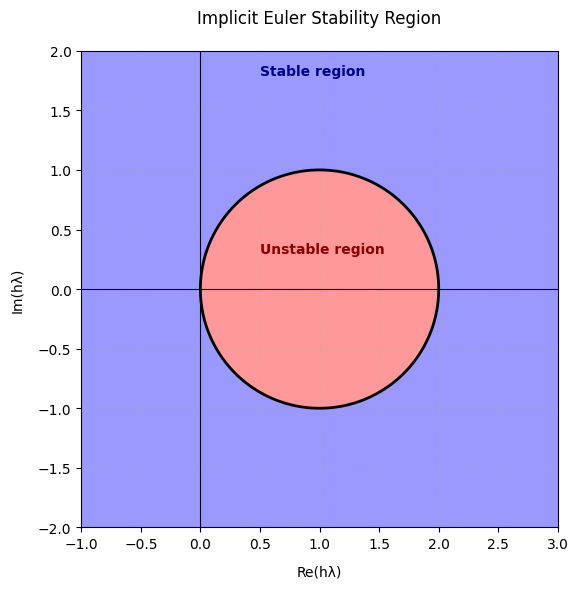

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Create grid in the complex plane
x = np.linspace(-1, 3, 400)
y = np.linspace(-2, 2, 400)
X, Y = np.meshgrid(x, y)
Z = X + 1j * Y

# Amplification factor for Implicit Euler: R(z) = 1/(1 - z)
R = 1 / (1 - Z)
R_mag = np.abs(R)

# Create figure
plt.figure(figsize=(7, 6))

# Plot stable (red) and unstable (blue) regions
plt.contourf(X, Y, R_mag <= 1, levels=[0, 0.5, 1.5], 
             colors=['red', 'blue'], alpha=0.4)

# Draw stability boundary (|R(z)| = 1)
plt.contour(X, Y, R_mag, levels=[1], colors='black', linewidths=2)



# Add axes and formatting
plt.axhline(0, color='black', lw=0.8)
plt.axvline(0, color='black', lw=0.8)
plt.title("Implicit Euler Stability Region", pad=20)
plt.xlabel("Re(hλ)", labelpad=10)
plt.ylabel("Im(hλ)", labelpad=10)
plt.gca().set_aspect('equal')

# Add legend and annotations (MATCHING YOUR UPDATED STYLE)
plt.text(0.5, 0.3, "Unstable region", color='darkred', weight='bold')  # Left half-plane is stable
plt.text(0.5, 1.8, "Stable region", color='darkblue', weight='bold')  # Right half-plane

plt.grid(True, linestyle=':', alpha=0.5)
plt.xlim(-1, 3)  # Slightly extended to show boundary
plt.ylim(-2, 2)
plt.tight_layout()
plt.show()

## Test on test problems

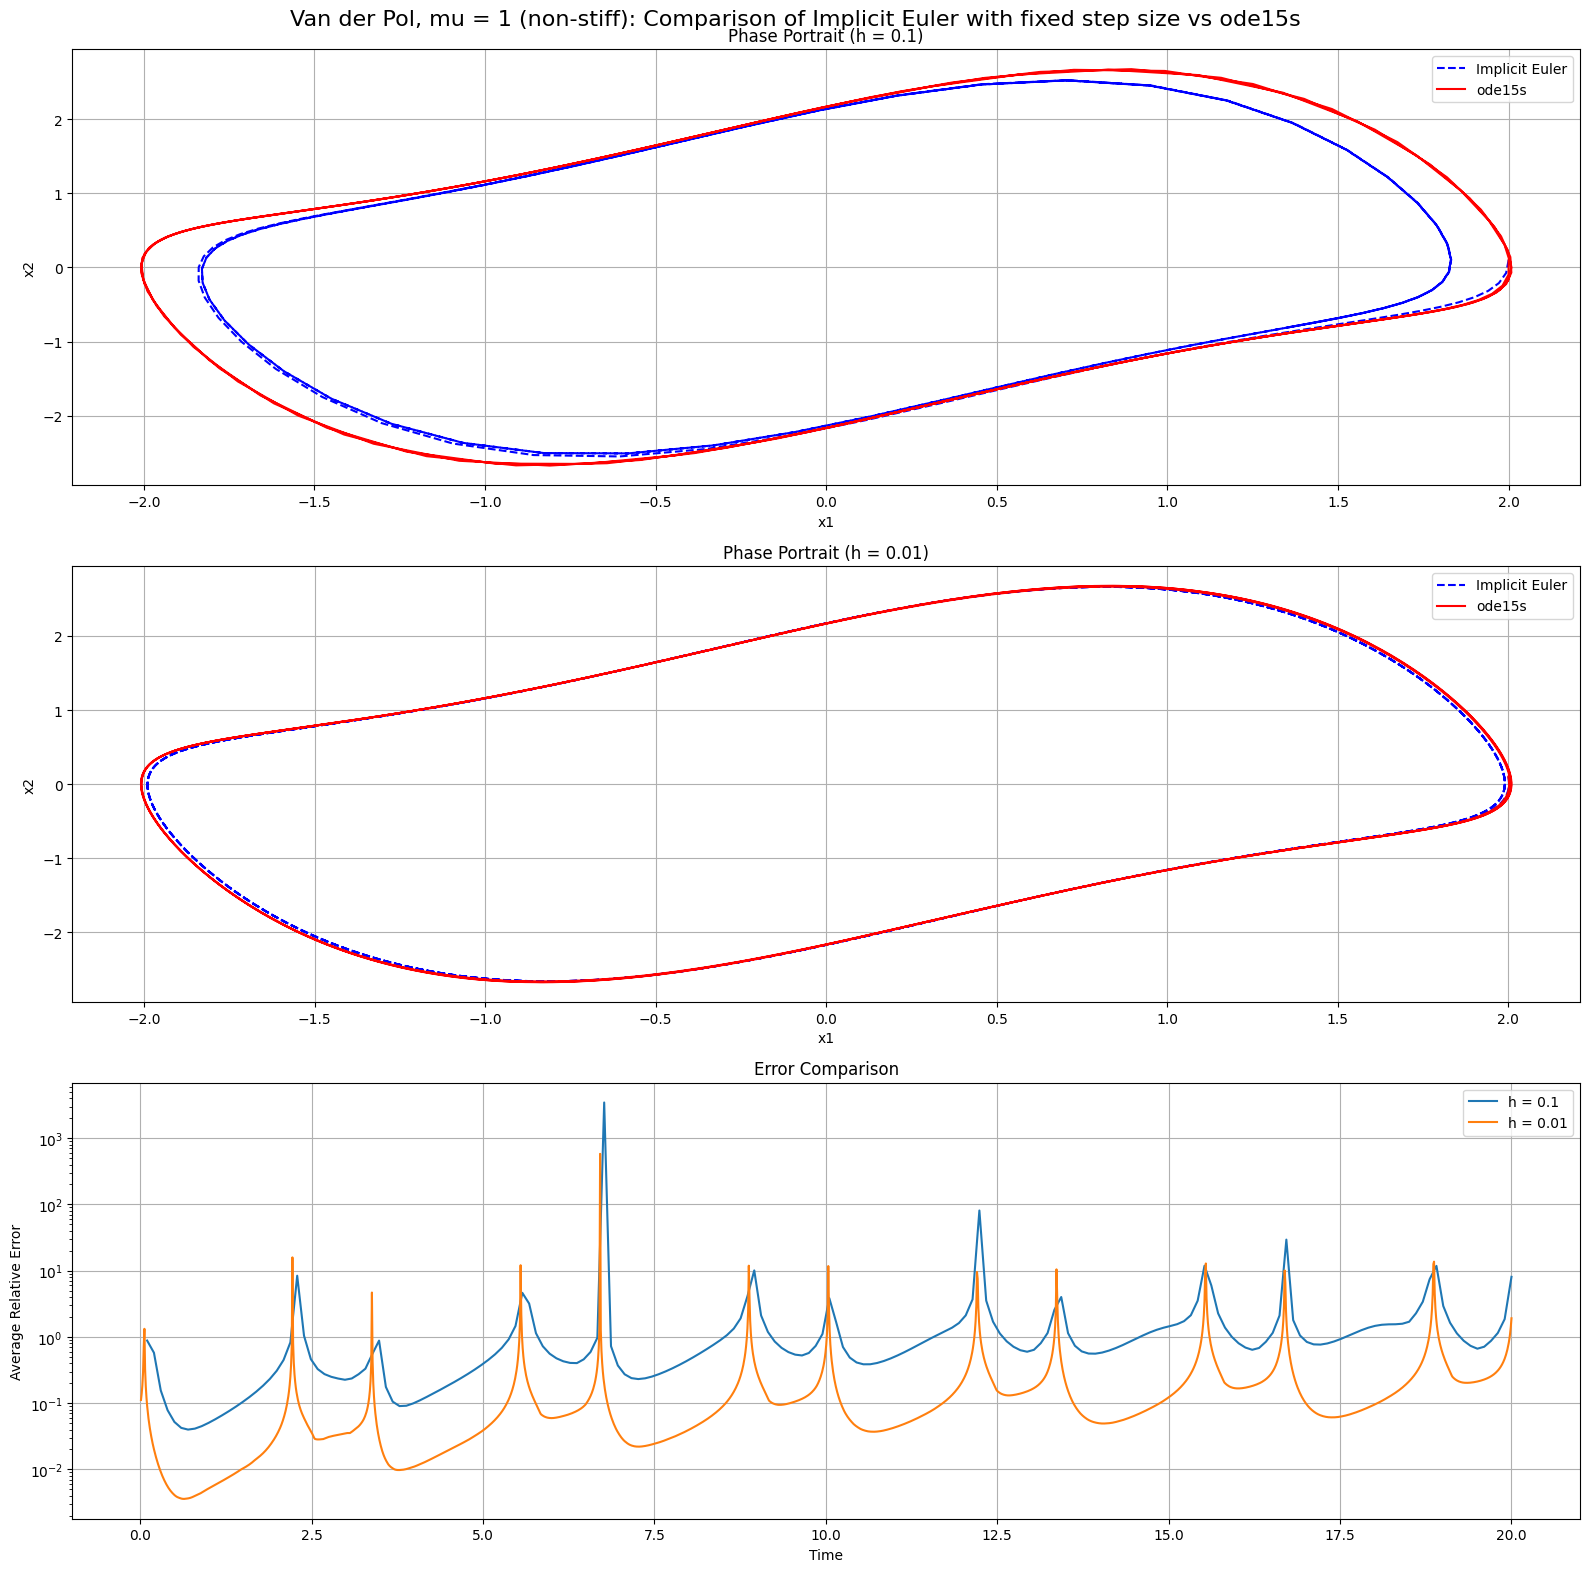

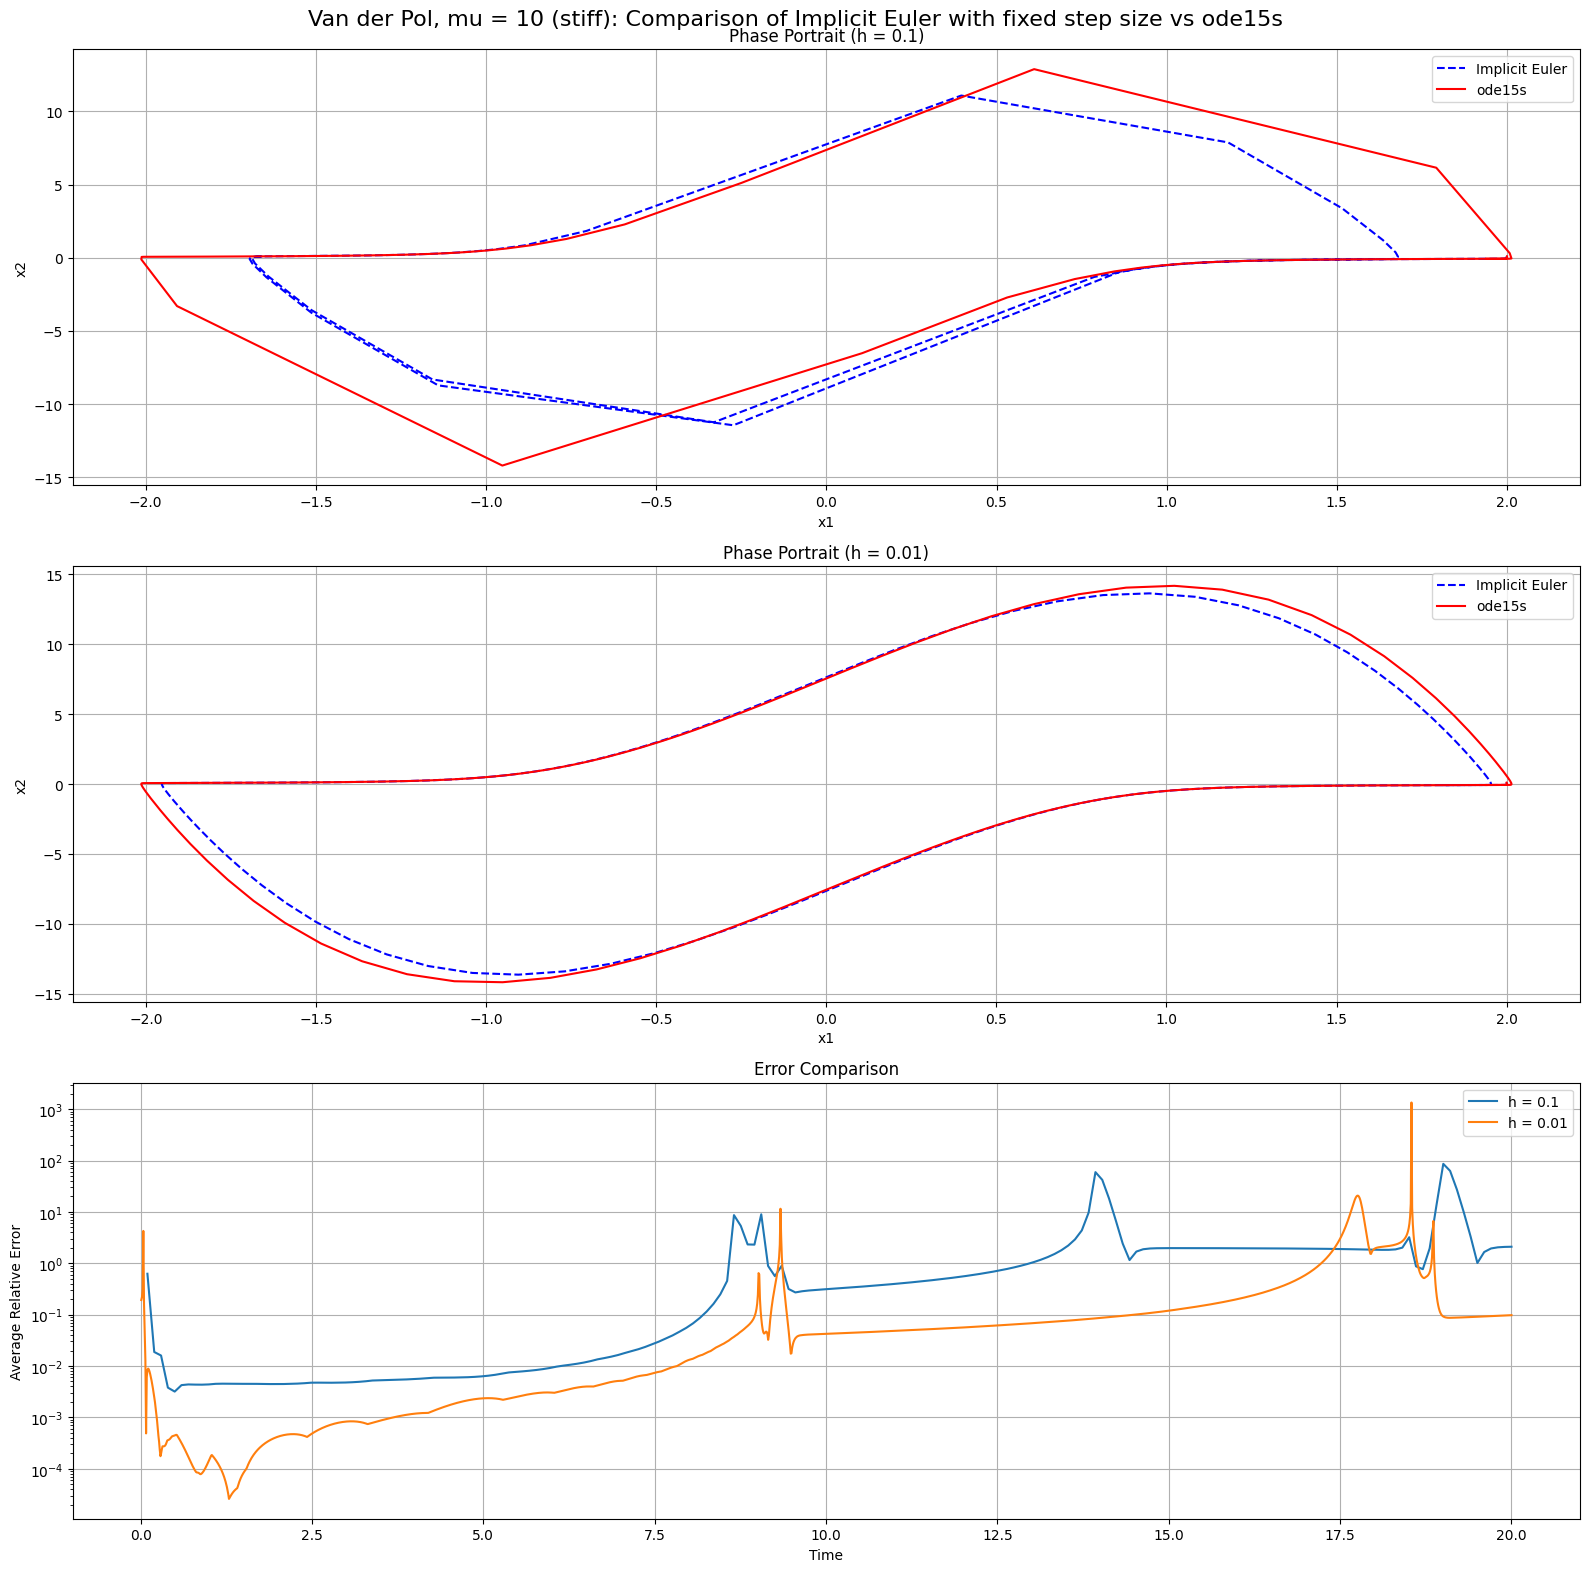

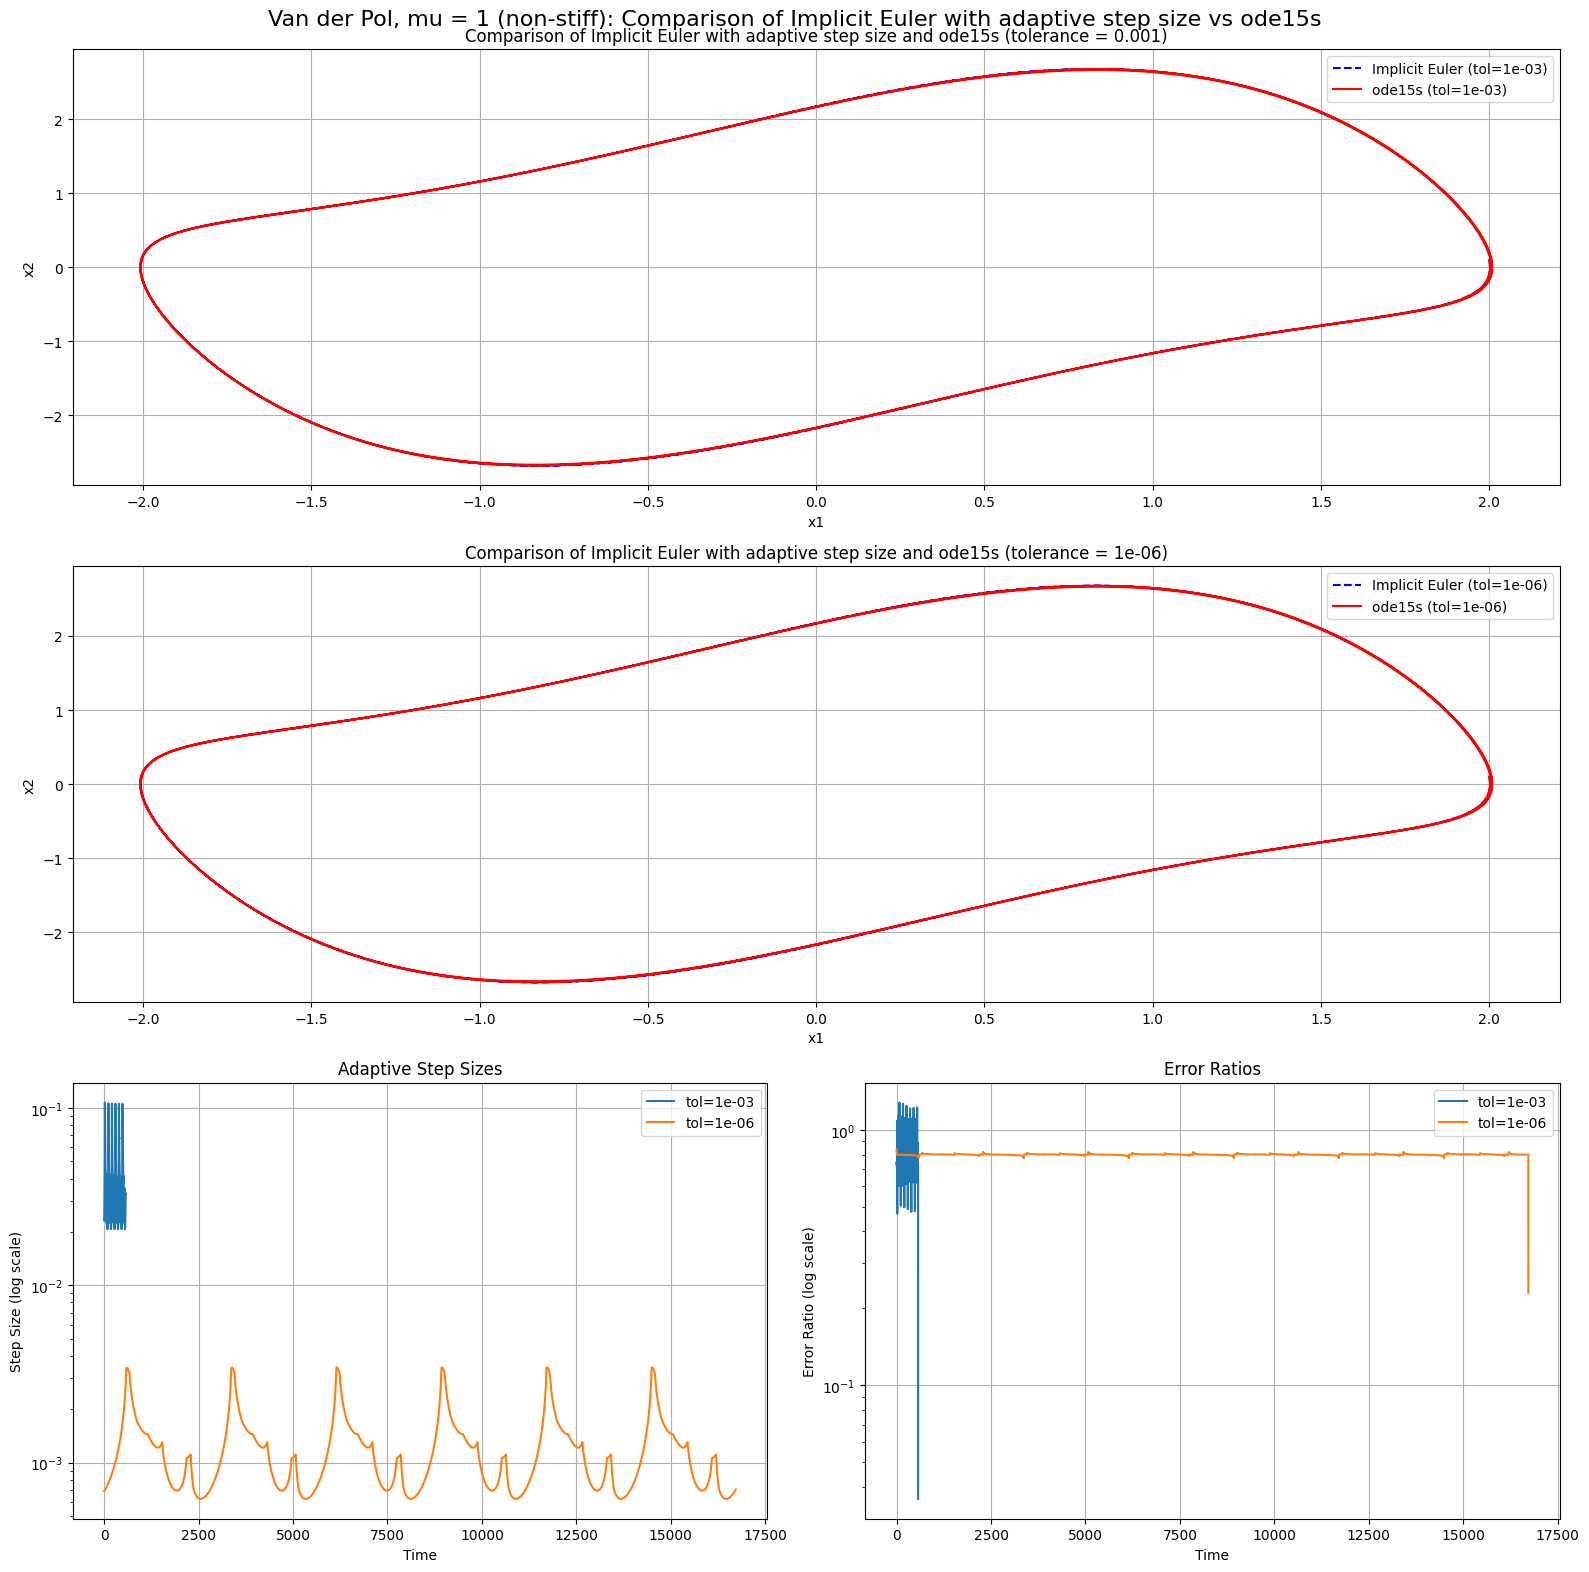

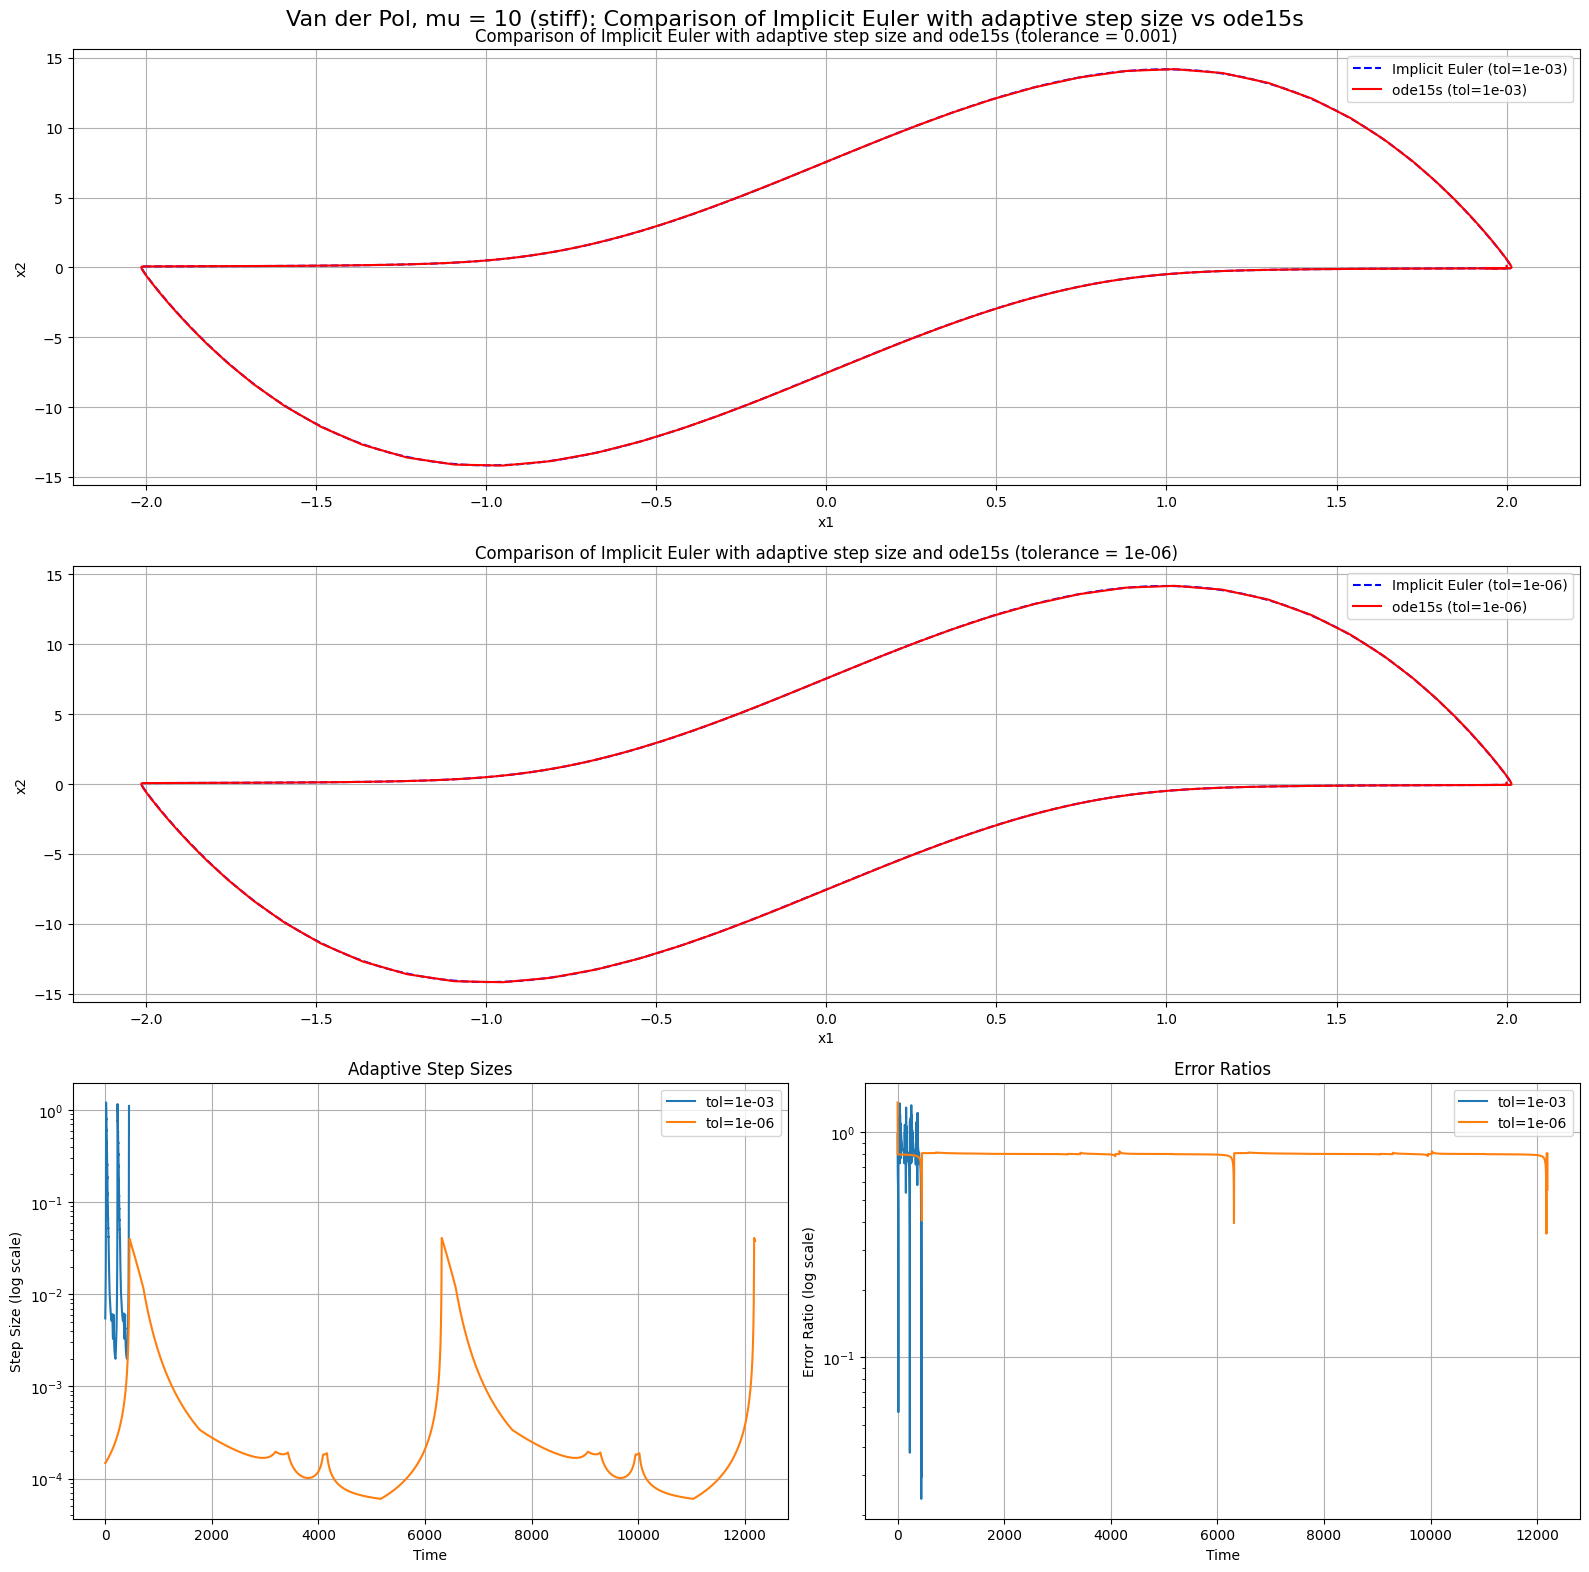

In [2]:
# Define time span and initial conditions
# Define time span and initial conditions
mu_nonstiff = 1  # Non-stiff
mu_stiff = 10  # Stiff
t_span = (0, 20)
x0 = np.array([2, 0.1])  # Initial condition

vp_imp_fixed_nonstifff = compare_solvers(van_der_pol_model, t_span, x0, params = [mu_nonstiff], model_name = f"Van der Pol, mu = {mu_nonstiff} (non-stiff)", reference_solver_name="ode15s", fixed_steps = True, implicit=True, reference_solver='BDF', euler = True)
vp_imp_fixed_stifff = compare_solvers(van_der_pol_model, t_span, x0, params = [mu_stiff], model_name = f"Van der Pol, mu = {mu_stiff} (stiff)", reference_solver_name="ode15s", fixed_steps = True, implicit=True, reference_solver='BDF', euler = True)
vp_imp_adaptive_nonstifff = compare_solvers(van_der_pol_model, t_span, x0, params = [mu_nonstiff], model_name = f"Van der Pol, mu = {mu_nonstiff} (non-stiff)", reference_solver_name="ode15s", steptype = "adaptive", adaptive_steps = True, h0 = 0.01, implicit=True, reference_solver='BDF', euler = True)
vp_imp_adaptive_stifff = compare_solvers(van_der_pol_model, t_span, x0, params = [mu_stiff], model_name = f"Van der Pol, mu = {mu_stiff} (stiff)", reference_solver_name="ode15s", steptype = "adaptive", adaptive_steps = True, h0 = 0.01, implicit=True, reference_solver='BDF',euler = True)

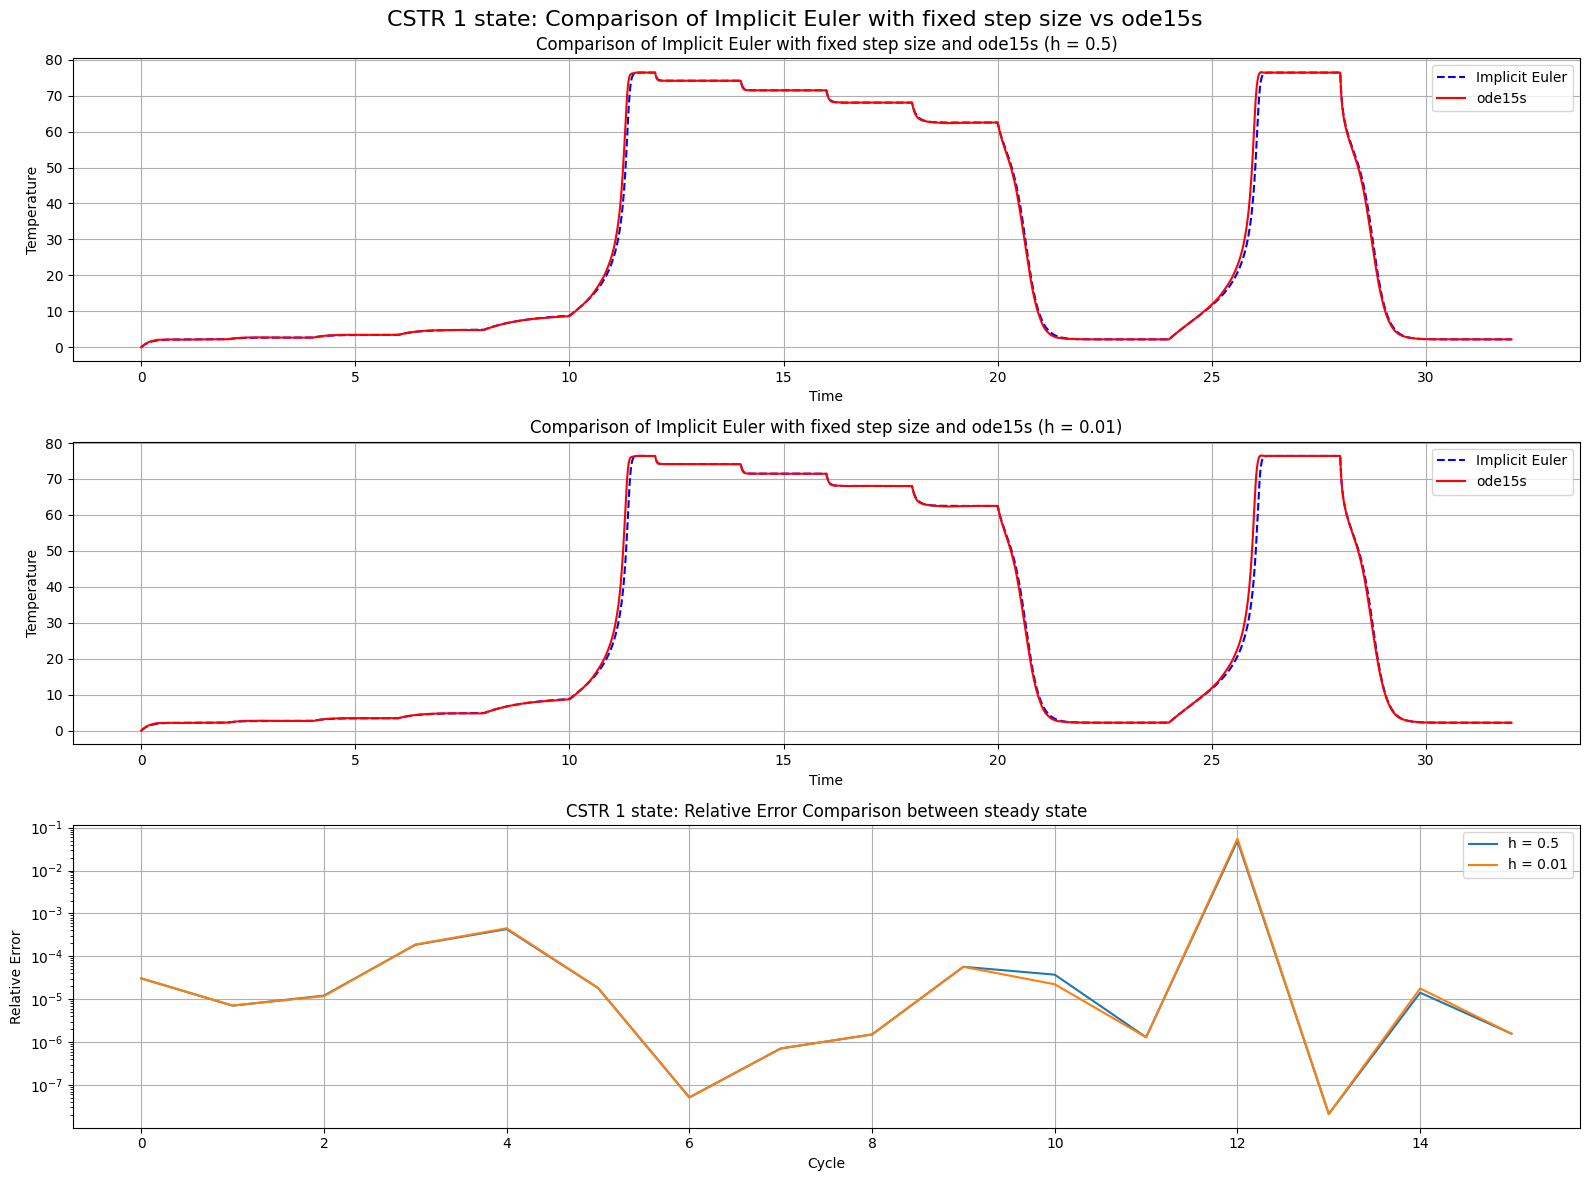

<Figure size 1600x1200 with 0 Axes>

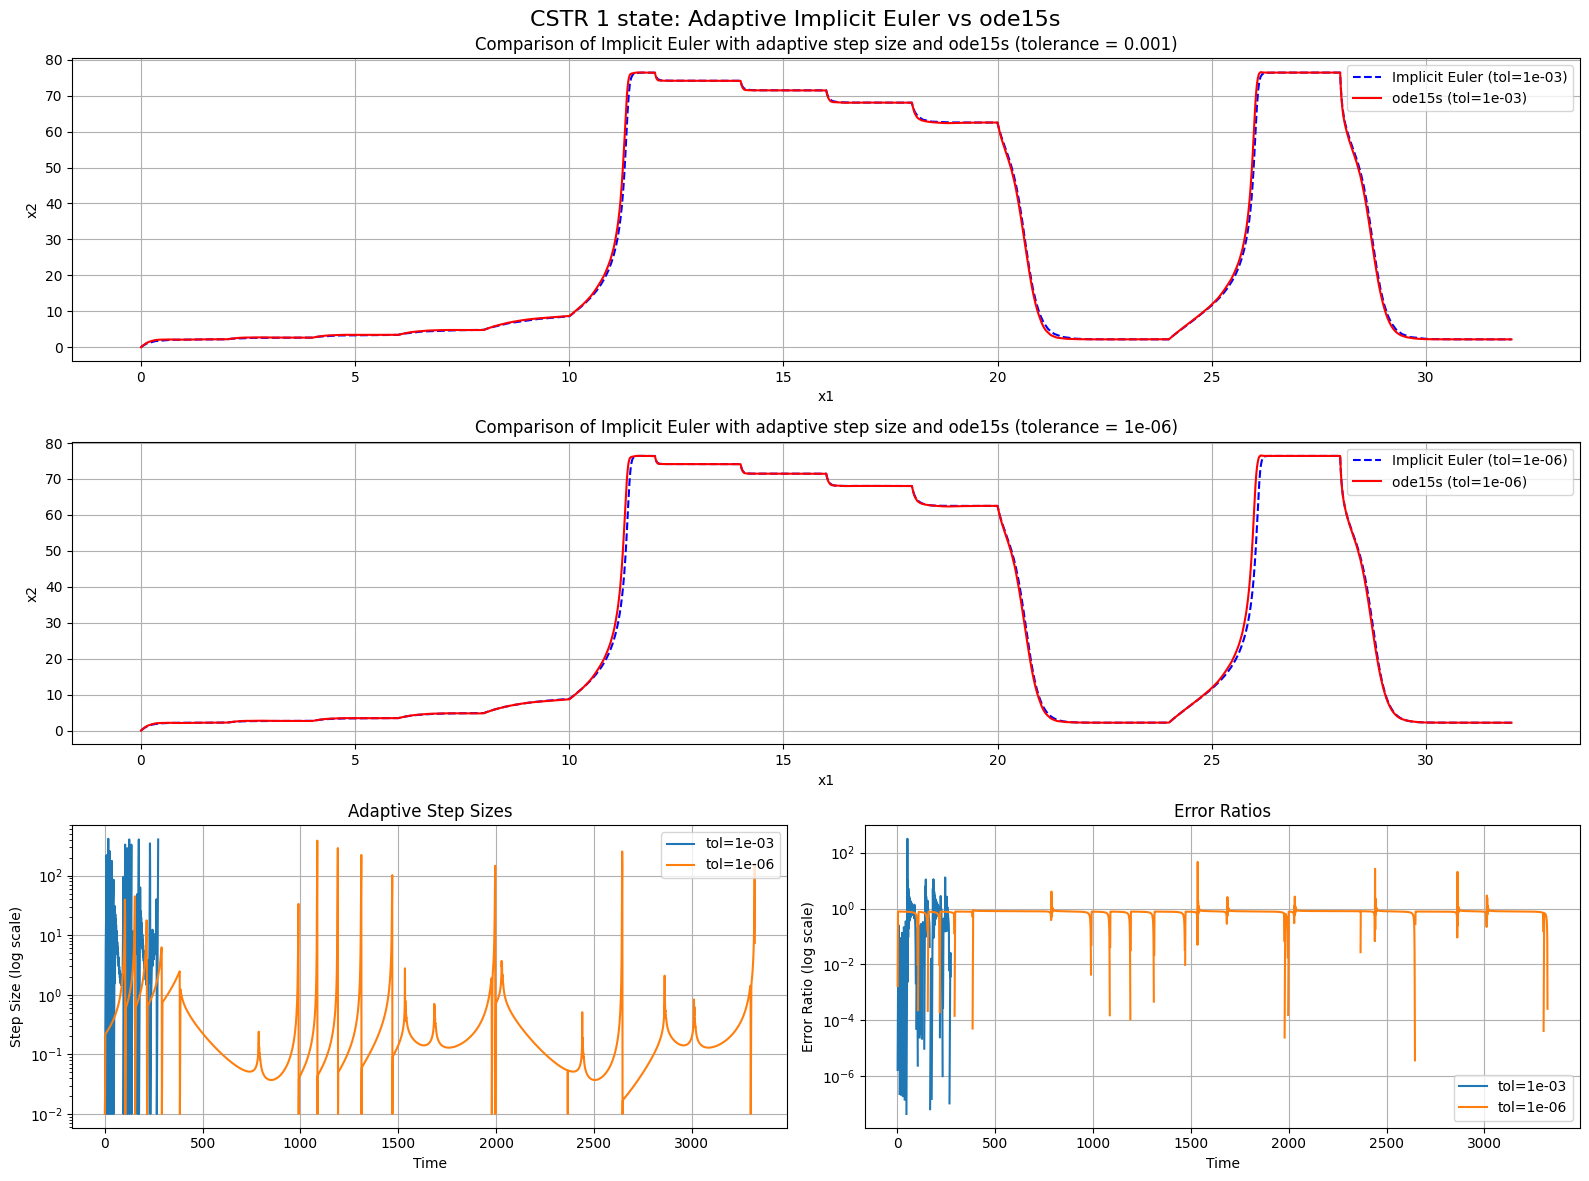

In [3]:
t_span = (0, 120)
cstr_imp_fixed = compare_solvers_cstr(CSTR_1state_model, t_span, model_name = "CSTR 1 state", reference_solver_name="ode15s", fixed_steps = True, implicit = True, euler = True, fixed_step_sizes=[0.5, 0.01])
cstr_imp_adaptive = compare_solvers_cstr(CSTR_1state_model, t_span, model_name = "CSTR 1 state", reference_solver_name="ode15s", steptype = "adaptive", adaptive_steps = True, h0 = 0.01, implicit = True, euler = True)

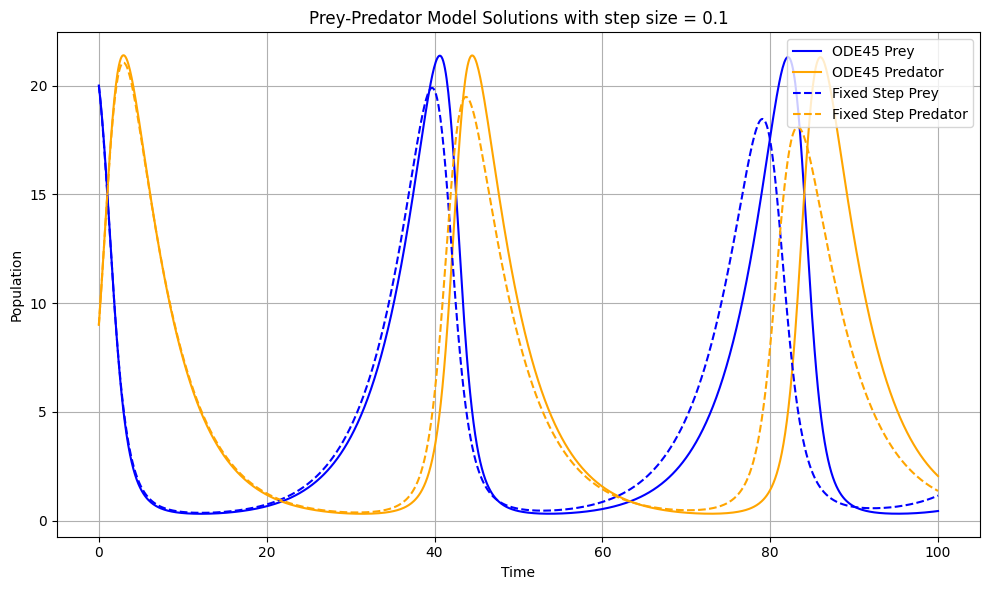

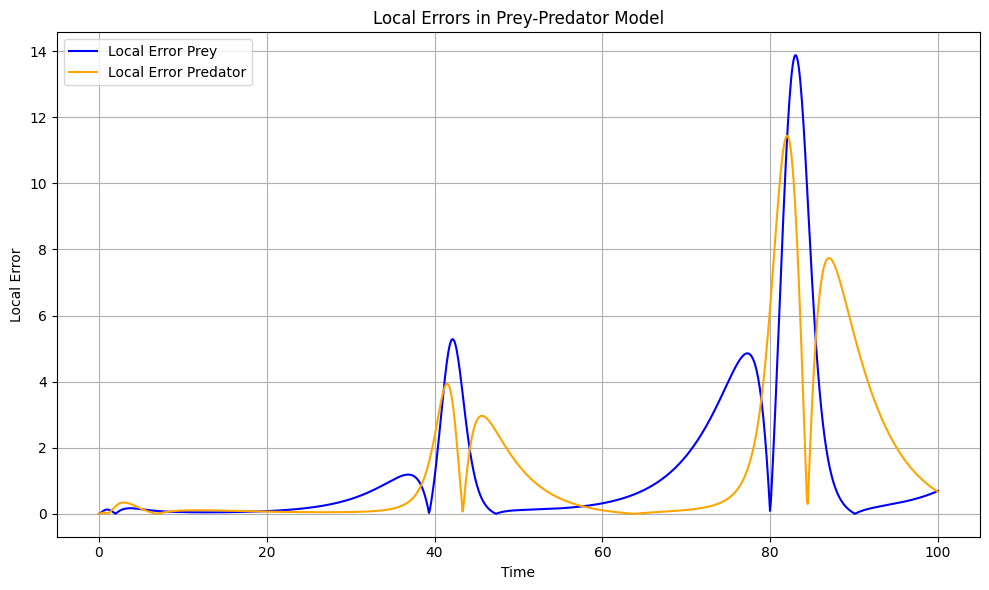

In [6]:
# Define time span and initial conditions
t_span = (0, 100)
x0 = np.array([20, 9])  # Example initial conditions for prey and predator populations
a = 0.2  # Prey growth rate
b = 0.04  # Predation rate

f, J = prey_predator_model(a, b)

N = 1000  
# Solve using ode45 (method='RK45')
solution_ode45 = solve_ivp(f, t_span, x0, method='LSODA', t_eval=np.linspace(t_span[0], t_span[1], N), jac = J)

# Solve using Explicit Euler with fixed step size

solution_fixed_t, solution_fixed_x = ImplicitEulerFixedStep(f, J, t_span[0], t_span[1], N, x0)


# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(solution_ode45.t, solution_ode45.y[0], label='ODE45 Prey', color='blue')
plt.plot(solution_ode45.t, solution_ode45.y[1], label='ODE45 Predator', color='orange')
plt.plot(solution_fixed_t, solution_fixed_x[0], label='Fixed Step Prey', linestyle='--', color='blue')
plt.plot(solution_fixed_t, solution_fixed_x[1], label='Fixed Step Predator', linestyle='--', color='orange')
plt.title('Prey-Predator Model Solutions with step size = 0.1')
plt.xlabel('Time')
plt.ylabel('Population')
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

# Plotting all the local errors over time
plt.figure(figsize=(10, 6))
plt.plot(solution_ode45.t, np.abs(solution_ode45.y[0] - solution_fixed_x[0, :len(solution_ode45.t)]), label='Local Error Prey', color='blue')
plt.plot(solution_ode45.t, np.abs(solution_ode45.y[1] - solution_fixed_x[1, :len(solution_ode45.t)]), label='Local Error Predator', color='orange')
plt.title('Local Errors in Prey-Predator Model')
plt.xlabel('Time')
plt.ylabel('Local Error')
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()


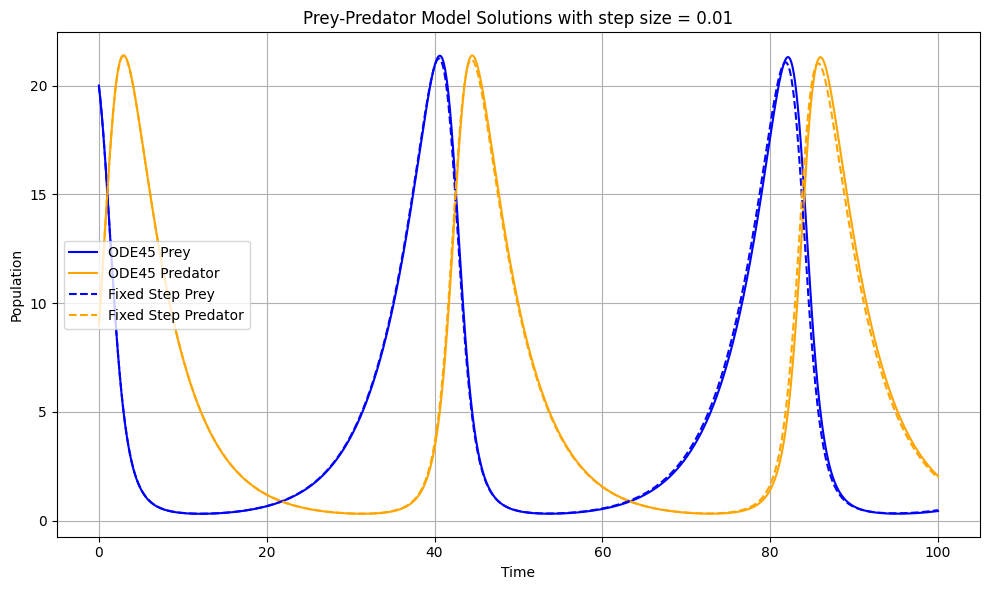

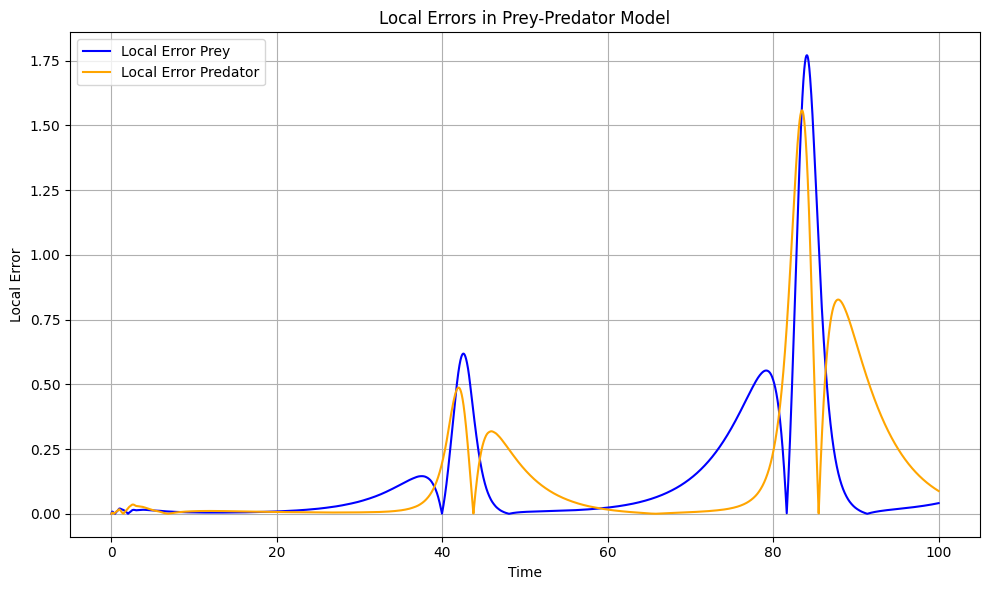

In [8]:
# Define time span and initial conditions
t_span = (0, 100)
x0 = np.array([20, 9])  # Example initial conditions for prey and predator populations
a = 0.2  # Prey growth rate
b = 0.04  # Predation rate

f, J = prey_predator_model(a, b)

N = 10000  
# Solve using ode45 (method='RK45')
solution_ode45 = solve_ivp(f, t_span, x0, method='LSODA', t_eval=np.linspace(t_span[0], t_span[1], N), jac = J)

# Solve using Explicit Euler with fixed step size

solution_fixed_t, solution_fixed_x = ImplicitEulerFixedStep(f, J, t_span[0], t_span[1], N, x0)


# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(solution_ode45.t, solution_ode45.y[0], label='ODE45 Prey', color='blue')
plt.plot(solution_ode45.t, solution_ode45.y[1], label='ODE45 Predator', color='orange')
plt.plot(solution_fixed_t, solution_fixed_x[0], label='Fixed Step Prey', linestyle='--', color='blue')
plt.plot(solution_fixed_t, solution_fixed_x[1], label='Fixed Step Predator', linestyle='--', color='orange')
plt.title('Prey-Predator Model Solutions with step size = 0.01')
plt.xlabel('Time')
plt.ylabel('Population')
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

# Plotting all the local errors over time
plt.figure(figsize=(10, 6))
plt.plot(solution_ode45.t, np.abs(solution_ode45.y[0] - solution_fixed_x[0, :len(solution_ode45.t)]), label='Local Error Prey', color='blue')
plt.plot(solution_ode45.t, np.abs(solution_ode45.y[1] - solution_fixed_x[1, :len(solution_ode45.t)]), label='Local Error Predator', color='orange')
plt.title('Local Errors in Prey-Predator Model')
plt.xlabel('Time')
plt.ylabel('Local Error')
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()


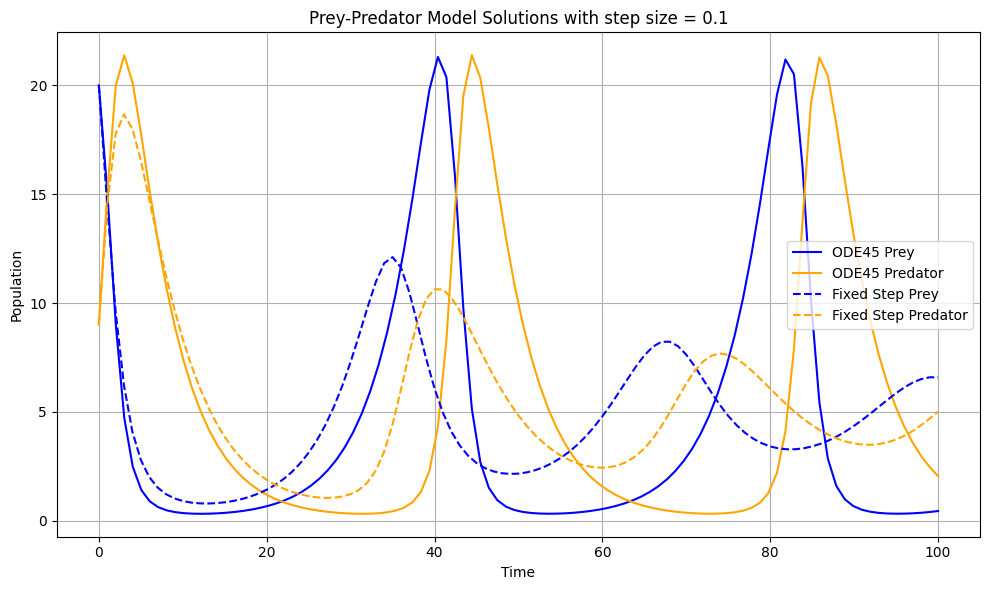

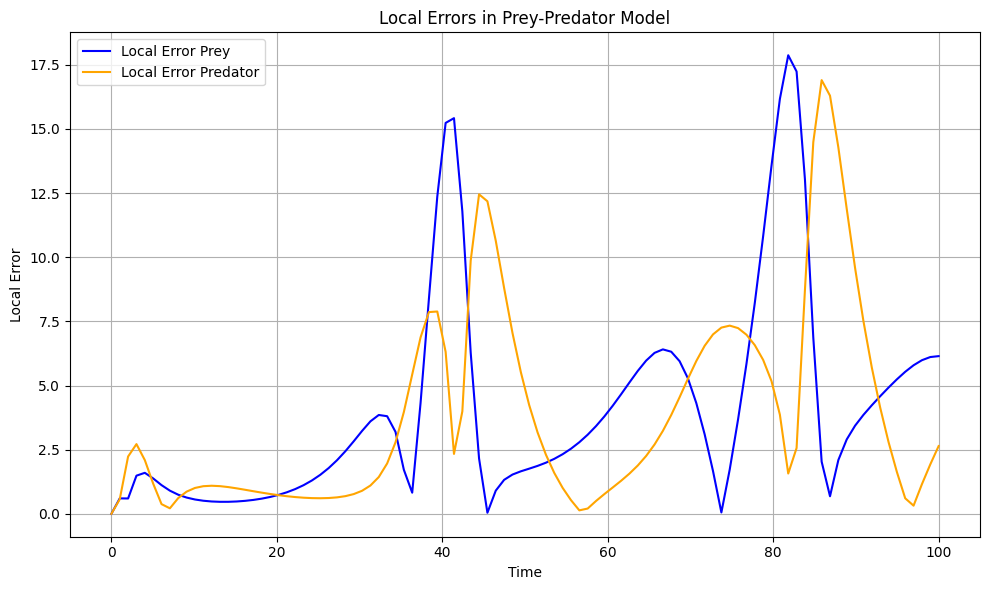

In [9]:
# Define time span and initial conditions
t_span = (0, 100)
x0 = np.array([20, 9])  # Example initial conditions for prey and predator populations
a = 0.2  # Prey growth rate
b = 0.04  # Predation rate

f, J = prey_predator_model(a, b)

N = 100
# Solve using ode45 (method='RK45')
solution_ode45 = solve_ivp(f, t_span, x0, method='LSODA', t_eval=np.linspace(t_span[0], t_span[1], N), jac = J)

# Solve using Explicit Euler with fixed step size

solution_fixed_t, solution_fixed_x = ImplicitEulerFixedStep(f, J, t_span[0], t_span[1], N, x0)


# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(solution_ode45.t, solution_ode45.y[0], label='ODE45 Prey', color='blue')
plt.plot(solution_ode45.t, solution_ode45.y[1], label='ODE45 Predator', color='orange')
plt.plot(solution_fixed_t, solution_fixed_x[0], label='Fixed Step Prey', linestyle='--', color='blue')
plt.plot(solution_fixed_t, solution_fixed_x[1], label='Fixed Step Predator', linestyle='--', color='orange')
plt.title('Prey-Predator Model Solutions with step size = 0.1')
plt.xlabel('Time')
plt.ylabel('Population')
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

# Plotting all the local errors over time
plt.figure(figsize=(10, 6))
plt.plot(solution_ode45.t, np.abs(solution_ode45.y[0] - solution_fixed_x[0, :len(solution_ode45.t)]), label='Local Error Prey', color='blue')
plt.plot(solution_ode45.t, np.abs(solution_ode45.y[1] - solution_fixed_x[1, :len(solution_ode45.t)]), label='Local Error Predator', color='orange')
plt.title('Local Errors in Prey-Predator Model')
plt.xlabel('Time')
plt.ylabel('Local Error')
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()


## Prey-predator adaptive time step

In [2]:
def ImplicitEulerAdaptiveStep(funJac, t0, x0, tf, h0, abstol, reltol, *args):
    # Initial conditions
    t = t0
    x = x0
    h = h0

    hmin = 0.1
    hmax = 5
    epstol = 0.8

    # Initialize output arrays
    T = [t0]
    X = [x0]
    H = [h0]

    # Main loop
    while t < tf:
        # Adjust step size
        if t + h > tf:
            h = tf - t

        f, J = funJac(t, x, *args)
        
        AcceptStep = False
        while not AcceptStep:
            #Compute the next step
            xnew = NewtonsMethodODE(funJac, t, x, h, x + h*f, abstol, 100, *args)

            hm = 0.5 * h
            tm = t + hm
            xm = NewtonsMethodODE(funJac, t, x, hm, x + hm*f, abstol, 100, *args)

            fm, Jm = funJac(tm, xm, *args)

            xnewm = NewtonsMethodODE(funJac, tm, xm, hm, xm + hm*fm, abstol, 100, *args)

            # Compute the error
            err = np.linalg.norm(xnewm - xnew, ord = np.inf)
            max1 = np.max([abstol, np.linalg.norm(xnewm, ord = np.inf) * reltol])
            r = np.max(err / max1)
            AcceptStep = (r <= 1)

            # Check if error is within tolerance
            if AcceptStep:
                # Update time and state
                t = t + h
                x = xnewm
                # Store values
                T.append(t)
                X.append(x)


            # Update step size
            h = np.max([hmin, np.min([hmax, np.sqrt(epstol / r)])]) * h
            H.append(h)

    return np.array(T), np.array(X), np.array(H)

def NewtonsMethodODE(fun_jac, tk, xk, dt, xinit, tol, maxit, *args):
    x = xinit
    k = 0
    t = tk + dt
    f, J = fun_jac(t + dt, x, *args)
    R = x - f*dt - xk
    I = np.eye(len(xk))
    while k < maxit and np.linalg.norm(R, np.inf) > tol:
        k = k + 1
        Rdx = I - J*dt
        dx = np.linalg.solve(Rdx, R)
        x = x - dx
        f, J = fun_jac(t, x, *args)
        R = x - dt*f - xk
    return x

In [3]:
def prey_predator_model(t, z, param, esdirk = False):
    x, y = z
    alpha, beta = param
    dxdt = alpha * x - beta * x * y
    dydt = beta * x * y - alpha * y
    f = np.array([dxdt, dydt])

    df_dx = alpha - beta * y
    df_dy = -beta * x
    dg_dx = beta * y
    dg_dy = beta * x - alpha
    jacobian =  np.array([[df_dx, df_dy],
                            [dg_dx, dg_dy]])

    return f, jacobian

In [4]:
# Define time span and initial conditions
t_span = (0, 100)
x0 = np.array([20, 9])  # Example initial conditions for prey and predator populations
a = 0.2  # Prey growth rate
b = 0.04  # Predation rate

#f, J = prey_predator_model(a, b)

N = 1000  
# Solve using ode45 (method='RK45')
solution_ode45 = solve_ivp(f, t_span, x0, method='LSODA', t_eval=np.linspace(t_span[0], t_span[1], N), jac = J)

# Solve using Explicit Euler with fixed step size

h0 = (t_span[1] - t_span[0]) / N
abstol = 1e-6
reltol = 1e-6

solution_fixed_t, solution_fixed_x = ImplicitEulerAdaptiveStep(prey_predator_model, t_span[0], x0, t_span[1], h0, abstol, reltol, np.array([a, b]))


# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(solution_ode45.t, solution_ode45.y[0], label='ODE45 Prey', color='blue')
plt.plot(solution_ode45.t, solution_ode45.y[1], label='ODE45 Predator', color='orange')
plt.plot(solution_fixed_t, solution_fixed_x[0], label='Fixed Step Prey', linestyle='--', color='blue')
plt.plot(solution_fixed_t, solution_fixed_x[1], label='Fixed Step Predator', linestyle='--', color='orange')
plt.title('Prey-Predator Model Solutions with step size = 0.1')
plt.xlabel('Time')
plt.ylabel('Population')
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

# Plotting all the local errors over time
plt.figure(figsize=(10, 6))
plt.plot(solution_ode45.t, np.abs(solution_ode45.y[0] - solution_fixed_x[0, :len(solution_ode45.t)]), label='Local Error Prey', color='blue')
plt.plot(solution_ode45.t, np.abs(solution_ode45.y[1] - solution_fixed_x[1, :len(solution_ode45.t)]), label='Local Error Predator', color='orange')
plt.title('Local Errors in Prey-Predator Model')
plt.xlabel('Time')
plt.ylabel('Local Error')
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()


NameError: name 'f' is not defined

In [5]:
# Define time span and initial conditions
t_span = (0, 100)
x0 = np.array([20, 9])  # Example initial conditions for prey and predator populations
a = 0.2  # Prey growth rate
b = 0.04  # Predation rate

f, J = prey_predator_model(a, b)

N = 1000  
# Solve using ode45 (method='RK45')
solution_ode45 = solve_ivp(f, t_span, x0, method='LSODA', t_eval=np.linspace(t_span[0], t_span[1], N), jac = J)

# Solve using Explicit Euler with fixed step size

h0 = (t_span[1] - t_span[0]) / N
abstol = 1e-5
reltol = 1e-5

solution_adaptive_t, solution_adaptive_x, solution_adaptive_h = ImplicitEulerAdaptiveStep(f, J, t_span, x0, h0, abstol, reltol)


# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(solution_ode45.t, solution_ode45.y[0], label='ODE45 Prey', color='blue')
plt.plot(solution_ode45.t, solution_ode45.y[1], label='ODE45 Predator', color='orange')
plt.plot(solution_adaptive_t, solution_adaptive_x[:,0], label='Fixed Step Prey', linestyle='--', color='blue')
plt.plot(solution_adaptive_t, solution_adaptive_x[:,1], label='Fixed Step Predator', linestyle='--', color='orange')
plt.title('Prey-Predator Model Solutions with step size = 0.1')
plt.xlabel('Time')
plt.ylabel('Population')
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

# Plotting all the local errors over time
plt.figure(figsize=(10, 6))
plt.plot(solution_ode45.t, np.abs(solution_ode45.y[0] - solution_adaptive_x[:len(solution_ode45.t),0]), label='Local Error Prey', color='blue')
plt.plot(solution_ode45.t, np.abs(solution_ode45.y[1] - solution_adaptive_x[:len(solution_ode45.t), 1]), label='Local Error Predator', color='orange')
plt.title('Local Errors in Prey-Predator Model')
plt.xlabel('Time')
plt.ylabel('Local Error')
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()


TypeError: prey_predator_model() missing 1 required positional argument: 'param'